In [15]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from jcopml.plot import plot_missing_value
from jcopml.tuning import grid_search_params as gsp
from jcopml.pipeline import cat_pipe, num_pipe

In [ ]:
num_pipe()

# Import Data

In [2]:
df = pd.read_csv("data/carprice.csv", index_col="ID")
df.drop(columns="Name", inplace=True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


# Splitting Data

In [26]:
X = df.drop(columns="Price")
y = df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4762, 10), (1191, 10), (4762,), (1191,))

# Check Missing Value

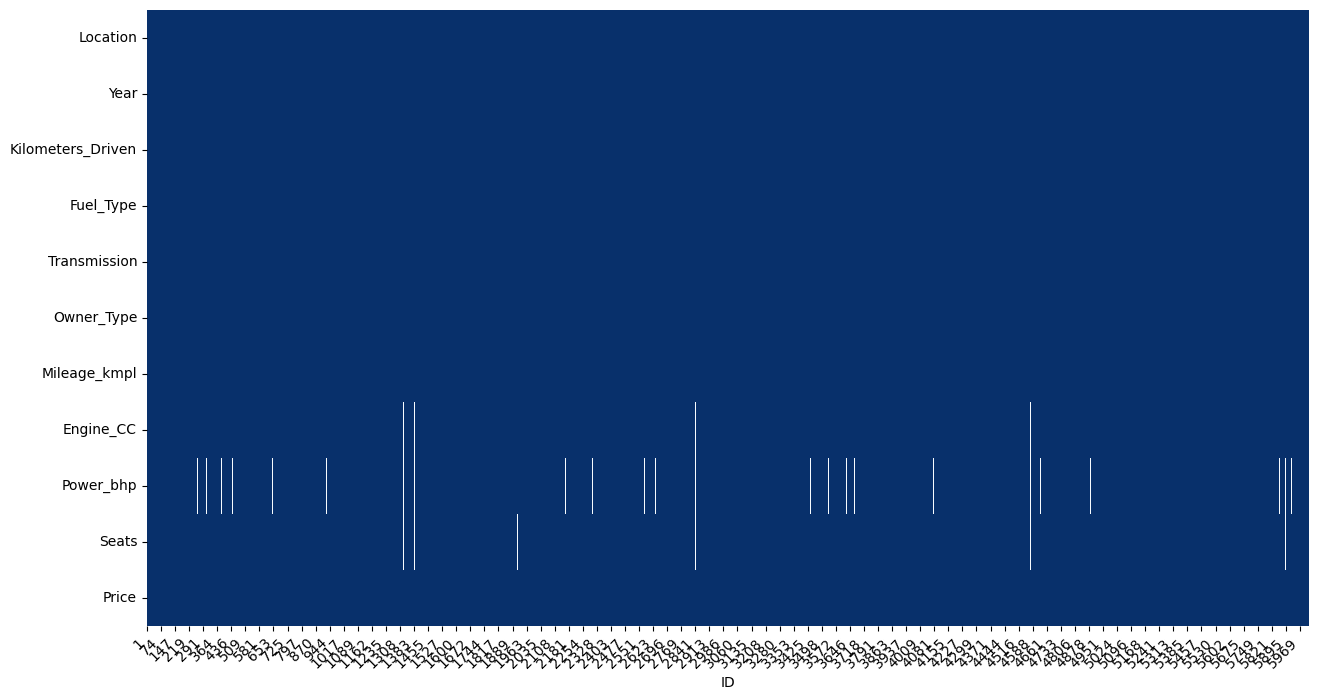

In [4]:
plot_missing_value(df)

# Preprocessing without Scalling

In [27]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(), ["Year", "Kilometers_Driven", "Mileage_kmpl", "Engine_CC", "Power_bhp", "Seats"]),
    ("category", cat_pipe(encoder="onehot"), ["Location", "Fuel_Type", "Transmission", "Owner_Type"])
])

# Training & Evaluation (not scaled)

In [19]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", SVR(max_iter=500))
])

model = GridSearchCV(pipeline, param_grid=gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.001}
0.4799922349506158 0.06775751495963767


# Preprocessing with Scalling

In [28]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling="robust"), ["Year", "Kilometers_Driven", "Mileage_kmpl", "Engine_CC", "Power_bhp", "Seats"]),
    ("category", cat_pipe(encoder="onehot"), ["Location", "Fuel_Type", "Transmission", "Owner_Type"])
])

# Training & Evaluation (scaled)

In [29]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", SVR(max_iter=500))
])

model = GridSearchCV(pipeline, param_grid=gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.1}
0.8692907569381978 0.8314246832596819


# Polynomial Features

In [24]:
from luwiji.svm import demo

In [25]:
demo.poly_features()

interactive(children=(ToggleButtons(description='degree', options=(1, 2, 3), value=1), Checkbox(value=False, d…

In [31]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling="robust", poly=2), ["Year", "Kilometers_Driven", "Mileage_kmpl", "Engine_CC", "Power_bhp", "Seats"]),
    ("category", cat_pipe(encoder="onehot"), ["Location", "Fuel_Type", "Transmission", "Owner_Type"])
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", SVR(max_iter=500))
])

model = GridSearchCV(pipeline, param_grid=gsp.svm_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

Fitting 3 folds for each of 294 candidates, totalling 882 fits


C:\Users\Nostics\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.1, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.8692907569381978 0.8314246832596819
